In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import glob

In [3]:
year_list = np.arange(1980,2000,step=1)
filename_list = []
for year in year_list:
    filename_list.append('Z500_'+str(year)+'_coarse.nc')

In [4]:
filename_list.remove('Z500_1983_coarse.nc')

In [5]:
filenum = 0
for file in filename_list:
    data = xr.open_dataset(file)
    extracted = np.asarray(data['z500']).reshape(-1,103*120).T
    
    if filenum == 0:
        data_matrix = extracted
        filenum+=1
    else:
        data_matrix = np.concatenate((data_matrix,extracted),axis=-1)

In [6]:
# Split train and test
training_data = data_matrix[:,:6*365]
testing_data = data_matrix[:,6*365:]

np.save('Training_snapshots.npy',training_data)
np.save('Testing_snapshots.npy',testing_data)

data_mean = np.mean(training_data,axis=-1)
np.save('Training_mean.npy',data_mean)

# Find fluctuations
training_fluc = training_data - data_mean[:,None]
testing_fluc = testing_data - data_mean[:,None]

In [28]:
print(data_matrix[:,:6*365].shape)

(12360, 2190)


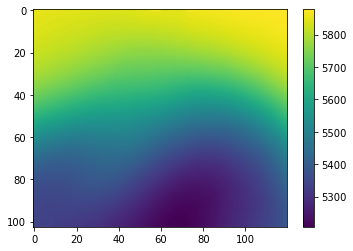

In [8]:
plt.figure()
plt.imshow(data_mean.reshape(103,120))
plt.colorbar()
plt.show()

### POD computation

In [9]:
u, s, _ = np.linalg.svd(training_fluc,full_matrices=False)

In [14]:
np.save('POD_Modes.npy',u)
np.save('Singular_Values.npy',s)

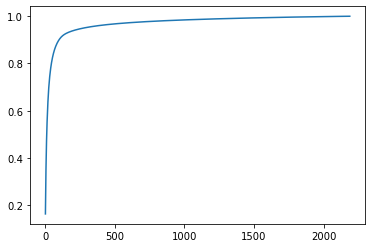

In [15]:
plt.figure()
plt.plot(np.cumsum(s)/np.sum(s))
plt.show()

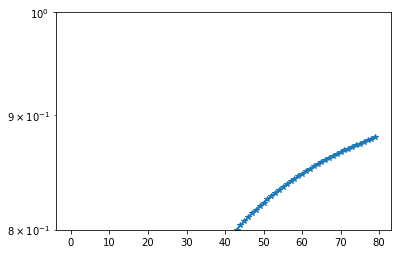

In [26]:
plt.figure()
plt.semilogy(np.cumsum(s[0:80])/np.sum(s), '*-')
plt.ylim([0.8,1])
plt.show()

In [16]:
(np.cumsum(s)/np.sum(s))[:100]

array([0.16277066, 0.21962817, 0.2708013 , 0.31550142, 0.35128832,
       0.38583484, 0.416314  , 0.44510347, 0.47149214, 0.495095  ,
       0.5157995 , 0.53503805, 0.55179584, 0.5681869 , 0.58380824,
       0.5989742 , 0.6125762 , 0.625675  , 0.63754064, 0.64880204,
       0.6595226 , 0.6698037 , 0.67958516, 0.6887651 , 0.6971523 ,
       0.704714  , 0.712222  , 0.71951157, 0.7263648 , 0.7330946 ,
       0.7394441 , 0.74538827, 0.7510102 , 0.75618005, 0.761248  ,
       0.7661998 , 0.7710421 , 0.77577823, 0.78032327, 0.7846993 ,
       0.78877014, 0.79268754, 0.7965106 , 0.8001759 , 0.80378   ,
       0.8072228 , 0.8105532 , 0.8137799 , 0.8168058 , 0.81981623,
       0.82271254, 0.8255578 , 0.82832485, 0.830949  , 0.83353084,
       0.83606577, 0.8384691 , 0.8408304 , 0.84311646, 0.8453349 ,
       0.847538  , 0.84967744, 0.85170484, 0.8537176 , 0.85566163,
       0.85757565, 0.85943186, 0.86123616, 0.8629985 , 0.8646943 ,
       0.86636645, 0.8679739 , 0.8695442 , 0.87108576, 0.87259

In [17]:
num_modes_trunc = 5
utrunc = u[:,:num_modes_trunc]
utrunc.shape

(12360, 5)

In [18]:
training_coeffs = np.matmul(utrunc.T,training_fluc)
testing_coeffs = np.matmul(utrunc.T,testing_fluc)

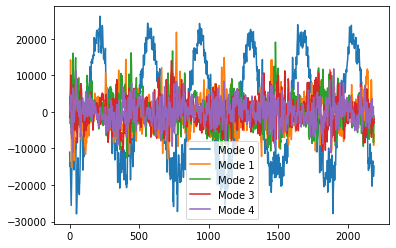

In [19]:
plt.figure()
plt.plot(training_coeffs[0,:],label='Mode 0')
plt.plot(training_coeffs[1,:],label='Mode 1')
plt.plot(training_coeffs[2,:],label='Mode 2')
plt.plot(training_coeffs[3,:],label='Mode 3')
plt.plot(training_coeffs[4,:],label='Mode 4')
plt.legend()
plt.show()

In [20]:
np.save('Training_Coefficients.npy',training_coeffs)
np.save('Testing_Coefficients.npy',testing_coeffs)

In [21]:
training_coeffs.shape

(5, 2190)